# 04 Exercise Binary MNIST

In [1]:
# Import librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms

# Scikit-learn per preprocessing e metriche
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Impostazioni
np.random.seed(42)
torch.manual_seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")
print(f"Device: {device}")
print(f"CUDA disponibile: {torch.cuda.is_available()}")

import os, urllib.request

# GitHub Release URL for pretrained weights
WEIGHTS_BASE_URL = os.environ.get('WEIGHTS_URL', 'https://github.com/SamueleBolotta/CEAR/releases/download/v1.0/')
WEIGHTS_DIR = '../pretrained_weights'
os.makedirs(WEIGHTS_DIR, exist_ok=True)

def load_or_train(model, train_fn, weights_filename, device='cpu'):
    """Load pretrained weights if available, otherwise train and save.
    Also saves/loads training history as JSON alongside weights."""
    weights_path = os.path.join(WEIGHTS_DIR, weights_filename)
    history_path = weights_path.replace('.pt', '_history.json')

    def _load_history():
        if os.path.exists(history_path):
            import json as _json
            with open(history_path, 'r') as f:
                return _json.load(f)
        return None

    if os.path.exists(weights_path):
        model.load_state_dict(torch.load(weights_path, map_location=device, weights_only=True))
        print(f"Loaded pretrained weights from {weights_path}")
        return _load_history()
    elif WEIGHTS_BASE_URL:
        try:
            url = WEIGHTS_BASE_URL + weights_filename
            urllib.request.urlretrieve(url, weights_path)
            # Also try downloading history
            try:
                urllib.request.urlretrieve(
                    WEIGHTS_BASE_URL + weights_filename.replace('.pt', '_history.json'), history_path)
            except Exception:
                pass
            model.load_state_dict(torch.load(weights_path, map_location=device, weights_only=True))
            print(f"Downloaded and loaded weights from {url}")
            return _load_history()
        except Exception as e:
            print(f"Could not download weights: {e}. Training from scratch...")

    history = train_fn()
    torch.save(model.state_dict(), weights_path)
    print(f"Saved weights to {weights_path}")
    if history is not None:
        import json as _json
        with open(history_path, 'w') as f:
            _json.dump(history, f)
        print(f"Saved training history to {history_path}")
    return history

PyTorch version: 2.10.0+cu128
Torchvision version: 0.25.0+cu128
Device: cuda
CUDA disponibile: True


## Esercizio 2

Dataset MNIST Binario (Pari vs Dispari)
Train: (60000, 784)
Distribuzione: Pari=29492, Dispari=30508


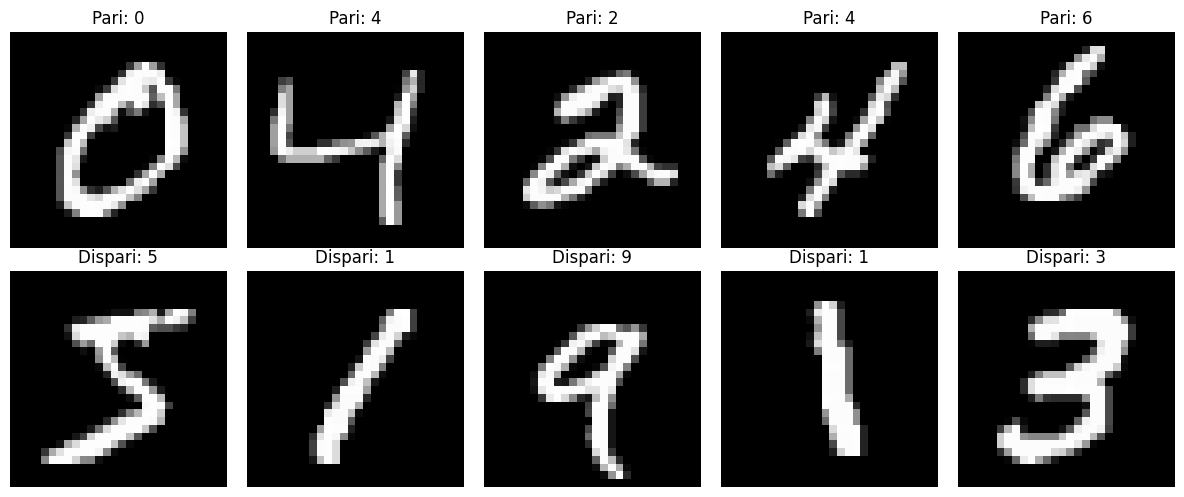

Architettura Shallow:
Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=1, bias=True)
)
Parametri: 50,305

Architettura Deep:
Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
)
Parametri: 110,849

Training Shallow Model...
Downloaded and loaded weights from https://github.com/SamueleBolotta/CEAR/releases/download/v1.0/nb04_ex2_shallow.pt

Training Deep Model...
Downloaded and loaded weights from https://github.com/SamueleBolotta/CEAR/releases/download/v1.0/nb04_ex2_deep.pt
* val_acc approssimata con train_acc (history non disponibile)
* val_acc approssimata con train_acc (history non disponibile)

CONFRONTO SHALLOW vs DEEP
modello  train_acc  val_acc  test_acc  num_params
Sh

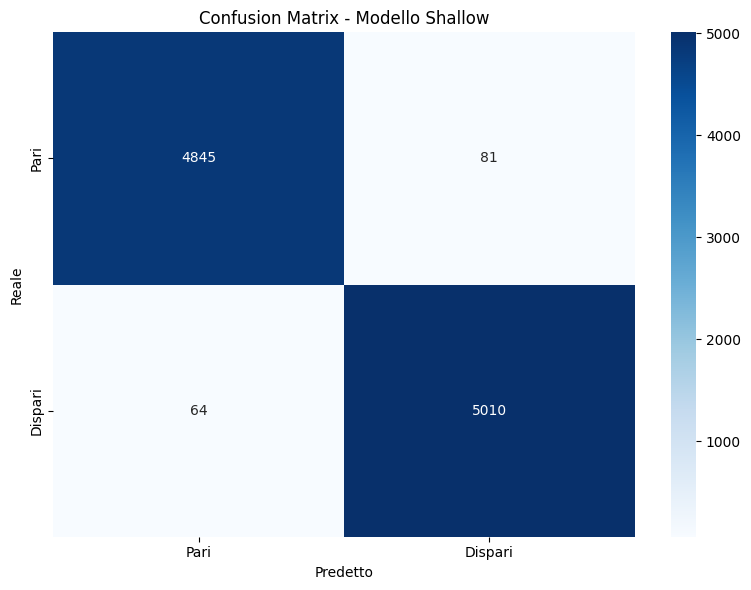


Classification Report - Modello Shallow:
              precision    recall  f1-score   support

        Pari       0.99      0.98      0.99      4926
     Dispari       0.98      0.99      0.99      5074

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



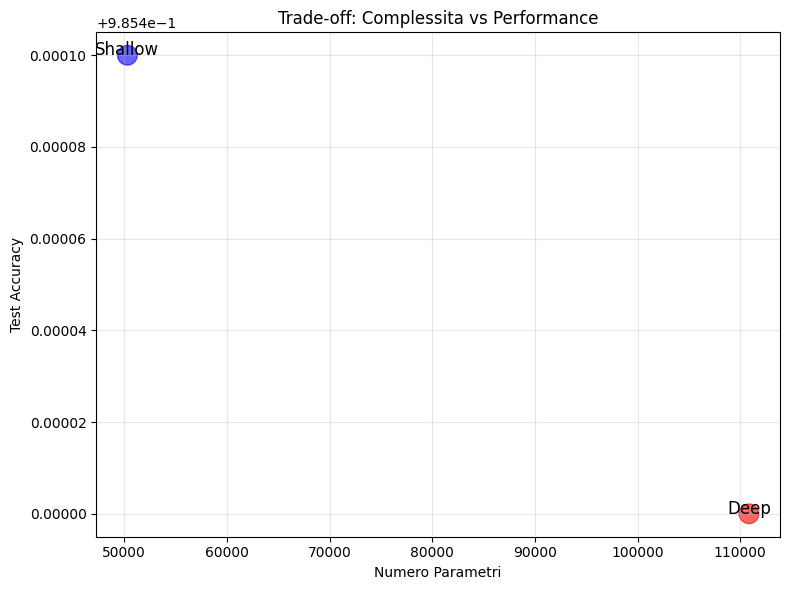


Esercizio 2 completato!


In [10]:
# ============================================================================
# ESERCIZIO 2: Costruzione e Training Rete Neurale Multi-Layer
# ============================================================================
# Task: Costruire rete neurale per classificazione binaria con diverse configurazioni
# Dataset: MNIST binario - classificare cifre pari vs dispari (60000 campioni)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision
from sklearn.metrics import classification_report, confusion_matrix

# Preparazione dataset binario: pari (0) vs dispari (1)
np.random.seed(456)
torch.manual_seed(456)
mnist_train_ex2 = torchvision.datasets.MNIST(root='../data', train=True, download=True)
mnist_test_ex2 = torchvision.datasets.MNIST(root='../data', train=False, download=True)

X_mnist = mnist_train_ex2.data.numpy()
y_mnist = mnist_train_ex2.targets.numpy()
X_test_mnist = mnist_test_ex2.data.numpy()
y_test_mnist = mnist_test_ex2.targets.numpy()

raise NotImplementedError()

raise NotImplementedError()

print(f"Dataset MNIST Binario (Pari vs Dispari)")
print(f"Train: {X_train_binary.shape}")
print(f"Distribuzione: Pari={np.sum(y_train_binary==0)}, Dispari={np.sum(y_train_binary==1)}")

# Visualizzazione esempi
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(5):
    axes[0, i].imshow(X_mnist[y_train_binary==0][i], cmap='gray')
    axes[0, i].set_title(f'Pari: {y_mnist[y_train_binary==0][i]}')
    axes[0, i].axis('off')
    axes[1, i].imshow(X_mnist[y_train_binary==1][i], cmap='gray')
    axes[1, i].set_title(f'Dispari: {y_mnist[y_train_binary==1][i]}')
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()

# Helper function for training binary models
def train_binary_model(model, X_train_np, y_train_np, epochs=15, batch_size=128, val_split=0.2):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    X_t = torch.FloatTensor(X_train_np).to(device)
    y_t = torch.FloatTensor(y_train_np).to(device)

    n_val = int(len(X_t) * val_split)
    indices = torch.randperm(len(X_t))
    X_tr = X_t[indices[n_val:]]
    y_tr = y_t[indices[n_val:]]
    X_v = X_t[indices[:n_val]]
    y_v = y_t[indices[:n_val]]

    train_ds = TensorDataset(X_tr, y_tr)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

    history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for bx, by in train_loader:
            optimizer.zero_grad()
            out = model(bx).squeeze()
            loss = criterion(out, by)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * bx.size(0)
            predicted = (torch.sigmoid(out) > 0.5).float()
            total += by.size(0)
            correct += (predicted == by).sum().item()

        train_loss = running_loss / total
        train_acc = correct / total

        model.eval()
        with torch.no_grad():
            val_out = model(X_v).squeeze()
            val_loss = criterion(val_out, y_v).item()
            val_pred = (torch.sigmoid(val_out) > 0.5).float()
            val_acc = (val_pred == y_v).sum().item() / len(y_v)

        history['loss'].append(train_loss)
        history['accuracy'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_accuracy'].append(val_acc)

        print(f'  Epoch {epoch+1}/{epochs} - loss: {train_loss:.4f} - accuracy: {train_acc:.4f} - val_loss: {val_loss:.4f} - val_accuracy: {val_acc:.4f}')

    return history

# Step 1: Costruzione modello shallow (1 hidden layer)
model_shallow = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
).to(device)

print("Architettura Shallow:")
print(model_shallow)
print(f'Parametri: {sum(p.numel() for p in model_shallow.parameters()):,}')

# Step 2: Costruzione modello deep (3 hidden layers)
model_deep_ex2 = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
).to(device)

print("\nArchitettura Deep:")
print(model_deep_ex2)
print(f'Parametri: {sum(p.numel() for p in model_deep_ex2.parameters()):,}')

# Step 3: Training entrambi i modelli (with pretrained weight support)
print("\nTraining Shallow Model...")
history_shallow = load_or_train(
    model_shallow,
    lambda: train_binary_model(model_shallow, X_train_binary, y_train_binary, epochs=15),
    'nb04_ex2_shallow.pt',
    device=device,
)

print("\nTraining Deep Model...")
history_deep = load_or_train(
    model_deep_ex2,
    lambda: train_binary_model(model_deep_ex2, X_train_binary, y_train_binary, epochs=15),
    'nb04_ex2_deep.pt',
    device=device,
)

# Step 4: Confronto performance
def evaluate_binary(model, X, y):
    model.eval()
    with torch.no_grad():
        X_t = torch.FloatTensor(X).to(device)
        out = model(X_t).squeeze()
        loss = nn.BCEWithLogitsLoss()(out, torch.FloatTensor(y).to(device)).item()
        raise NotImplementedError()
        acc = (pred.cpu().numpy() == y).mean()
    return loss, acc

test_loss_shallow, test_acc_shallow = evaluate_binary(model_shallow, X_test_binary, y_test_binary)
test_loss_deep, test_acc_deep = evaluate_binary(model_deep_ex2, X_test_binary, y_test_binary)

# Use history if available, otherwise evaluate model directly
if history_shallow:
    train_acc_shallow = max(history_shallow['accuracy'])
    val_acc_shallow = max(history_shallow['val_accuracy'])
else:
    _, train_acc_shallow = evaluate_binary(model_shallow, X_train_binary, y_train_binary)
    val_acc_shallow = train_acc_shallow  # approximation when no history
    print('* val_acc approssimata con train_acc (history non disponibile)')
if history_deep:
    train_acc_deep = max(history_deep['accuracy'])
    val_acc_deep = max(history_deep['val_accuracy'])
else:
    _, train_acc_deep = evaluate_binary(model_deep_ex2, X_train_binary, y_train_binary)
    val_acc_deep = train_acc_deep  # approximation when no history
    print('* val_acc approssimata con train_acc (history non disponibile)')

comparison_df = pd.DataFrame([
    {
        'modello': 'Shallow',
        'train_acc': train_acc_shallow,
        'val_acc': val_acc_shallow,
        'test_acc': test_acc_shallow,
        'num_params': sum(p.numel() for p in model_shallow.parameters())
    },
    {
        'modello': 'Deep',
        'train_acc': train_acc_deep,
        'val_acc': val_acc_deep,
        'test_acc': test_acc_deep,
        'num_params': sum(p.numel() for p in model_deep_ex2.parameters())
    }
])

print("\n" + "="*70)
print("CONFRONTO SHALLOW vs DEEP")
print("="*70)
print(comparison_df.to_string(index=False))

# Visualizzazione learning curves
if history_shallow is not None and history_deep is not None:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].plot(history_shallow['accuracy'], label='Shallow Train', linestyle='--')
    axes[0].plot(history_shallow['val_accuracy'], label='Shallow Val', linestyle='--')
    axes[0].plot(history_deep['accuracy'], label='Deep Train')
    axes[0].plot(history_deep['val_accuracy'], label='Deep Val')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy: Shallow vs Deep')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    axes[1].plot(history_shallow['loss'], label='Shallow Train', linestyle='--')
    axes[1].plot(history_shallow['val_loss'], label='Shallow Val', linestyle='--')
    axes[1].plot(history_deep['loss'], label='Deep Train')
    axes[1].plot(history_deep['val_loss'], label='Deep Val')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].set_title('Loss: Shallow vs Deep')
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()
else:
    print("Using pretrained weights - learning curves not available")

# Step 5: Analisi errori
best_model_ex2 = model_deep_ex2 if test_acc_deep > test_acc_shallow else model_shallow
best_name_ex2 = 'Deep' if test_acc_deep > test_acc_shallow else 'Shallow'

best_model_ex2.eval()
with torch.no_grad():
    X_test_t = torch.FloatTensor(X_test_binary).to(device)
    y_pred_probs = torch.sigmoid(best_model_ex2(X_test_t).squeeze()).cpu().numpy()
y_pred_ex2 = (y_pred_probs > 0.5).astype(int)
cm = confusion_matrix(y_test_binary, y_pred_ex2)

plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pari', 'Dispari'],
            yticklabels=['Pari', 'Dispari'])
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.title(f'Confusion Matrix - Modello {best_name_ex2}')
plt.tight_layout()
plt.show()

print(f'\nClassification Report - Modello {best_name_ex2}:')
print(classification_report(y_test_binary, y_pred_ex2, target_names=['Pari', 'Dispari']))

# Confronto parametri vs performance
fig, ax = plt.subplots(figsize=(8, 6))
models_data = comparison_df['modello'].values
params = comparison_df['num_params'].values
test_accs = comparison_df['test_acc'].values

scatter = ax.scatter(params, test_accs, s=200, alpha=0.6, c=['blue', 'red'])
for i, txt in enumerate(models_data):
    ax.annotate(txt, (params[i], test_accs[i]), fontsize=12, ha='center')

ax.set_xlabel('Numero Parametri')
ax.set_ylabel('Test Accuracy')
ax.set_title('Trade-off: Complessita vs Performance')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nEsercizio 2 completato!")

# Ripristino seed globali
np.random.seed(42)
torch.manual_seed(42)